In [1]:
%load_ext autoreload
%autoreload 2
from nect.src.phantom.geometric import Phantom, Rectangle, Ellipse, Triangle, PhantomObject, Circle 
import matplotlib.pyplot as plt
import numpy as np

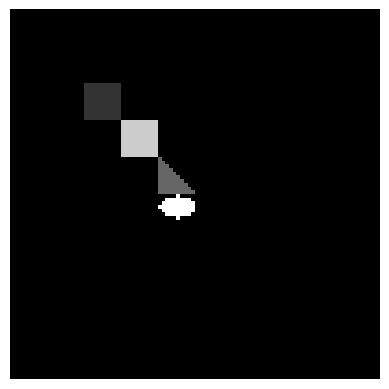

In [2]:
# Define geometric shapes
rectangle = Rectangle(10, 10)
triangle = Triangle(10, 10)
ellipse = Ellipse(10, 10, 3, 5)

# Define how the objects in a phantom move and change intensity with respect to time
phantom_rectangle = PhantomObject(lambda tlbr, t : tlbr + t, lambda intensity, t : intensity, np.array([10, 10]), rectangle, intensity=1)
phantom_rectangle2 = PhantomObject(lambda tlbr, t : tlbr + t, lambda intensity, t : intensity - 0.1*t, np.array([20, 20]), rectangle, intensity=5)
phantom_triangle = PhantomObject(lambda tlbr, t : tlbr + t, lambda intensity, t: intensity + 0.1*t, np.array([30, 30]), triangle, intensity=1)
phantom_ellipse = PhantomObject(lambda tlbr, t : np.array([tlbr[0], tlbr[1] - t, tlbr[2], tlbr[3] - t]), lambda intensity, t: intensity, np.array([50, 50]), ellipse, intensity=5)

# Create a phantom and add the objects to it
test_phantom = Phantom(size=(100,100), background_method="zeros")
test_phantom.add_phantom_object([phantom_rectangle, phantom_rectangle2, phantom_triangle, phantom_ellipse])

# Save a video of the phantom for 30 frames
test_phantom.save_video(time_steps=np.arange(0, 30, 1), filename="phantom_example.mp4", fps=5)

# Get the phantom image at time t=10
phantom_img = test_phantom.get_phantom(t=10)
plt.imshow(phantom_img, cmap='gray')

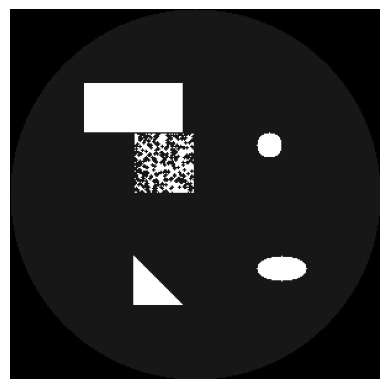

In [29]:
from nect.src.phantom.utils import create_random_closed_geometry

phantom = Phantom(size=(300,300), background_method="zeros")
circle = Circle(300, 300, 150)
rectangle = Rectangle(40,80)
triangle = Triangle(40, 80)
small_circle = Circle(20,20,10)
ellipse = Ellipse(40, 80, 10, 20)
random = create_random_closed_geometry(size=(50,50))

def eom_horizontal(tlbr, t):
    return tlbr + t * np.array([0, 1, 0, 1])
def eom_vertical(tlbr, t):
    return tlbr + t * np.array([1, 0, 1, 0])
def eom_diagonal(tlbr, t):
    return tlbr + t

phantom_circle = PhantomObject(lambda tlbr, t : tlbr, lambda intensity, t : intensity, np.array([0, 0]), circle, intensity=.1)
phantom_rectangle = PhantomObject(eom_horizontal, lambda intensity, t : intensity, np.array([60, 60]), rectangle, intensity=1)
phantom_random = PhantomObject(eom_diagonal, lambda intensity, t : intensity, np.array([100, 100]), random, intensity=1)
phantom_ellipse = PhantomObject(eom_vertical, lambda intensity, t : intensity, np.array([200, 200]), ellipse, intensity=1)
phantom_small_circle = PhantomObject(eom_diagonal, lambda intensity, t : intensity, np.array([100, 200]), small_circle, intensity=1)
phantom_triangle = PhantomObject(eom_diagonal, lambda intensity, t : intensity, np.array([200, 100]), triangle, intensity=1)

phantom.add_phantom_object([phantom_circle, phantom_rectangle, phantom_random, phantom_ellipse, phantom_small_circle, phantom_triangle])
phantom.save_video(time_steps=np.arange(0, 30, 1), filename="phantom_example.mp4", fps=5)
plt.imshow(phantom.get_phantom(t=0), cmap='gray')

## 3D Phantom. See demo_3d_phantom for visualization

In [2]:
from nect.src.phantom.geometric import Cuboid, Sphere
import torch

In [14]:
cuboid = Cuboid(10, 25, 50)
sphere = Sphere(20, 20, 20, 10)

cuboid_obj = PhantomObject(eom=lambda tlbr, t: tlbr, eoi= lambda intensity, t: intensity, tl=torch.tensor([0,0]), geometry=cuboid, intensity=1)
sphere_obj = PhantomObject(eom=lambda tlbr, t: tlbr, eoi= lambda intensity, t: intensity, tl=torch.tensor([50,50,50]), geometry=sphere, intensity=0.5)

phantom = Phantom(size=(100,100,100))
phantom.add_phantom_object(obj=[cuboid_obj, sphere_obj])

AssertionError: Initialization coordinates and geometry must have the same dimensionality.